In [ ]:
# Fotoğraflardaki el yazısıyla yazılmış rakamları otomatik olarak tanıyan bir proje yapacağız.
# mnist veri setinde 0-9 arasındaki rakamların el yazısı ile yazılmış farklı fotoğrafları bulunmaktadır. Bu veri setindeki
# fotoğrafları kullanarak her bir rakam için modeli eğiticez ve sonra modelin el yazısı ile yazılmış bir rakamı tanımasını 
# isteyeceğiz.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
mnist = fetch_openml('mnist_784')

In [ ]:
# Toplam 70.000 veri (60.000'i train, 10.000'i ise test veri seti olrk ayırıcaz) ve 784 feature sütunu bulunmaktadır.

In [3]:
mnist.data.shape

(70000, 784)

In [ ]:
# mnist veri setindeki ilgili indexteki rakamın fotoğrafını görmek için : 

In [4]:
def show_image(dframe, index):    
    plt.imshow(dframe.to_numpy()[index].reshape(28,28),cmap="binary")
    plt.axis("off")
    plt.show()

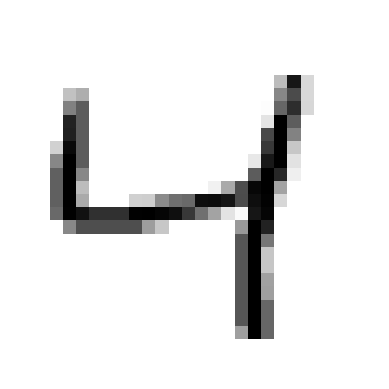

In [5]:
show_image(mnist.data, 2)

In [6]:
X = mnist.data
y = mnist.target

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/7,random_state=42)

In [ ]:
# X_test değişikliğe uğrayacağı için kopyalarız.X_test_copy ile rakam tahminlerimizin doğruluğunu kontrol etmek için kullanırız

In [8]:
X_test_copy = X_test.copy()

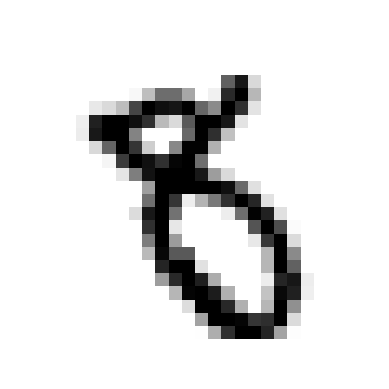

In [9]:
show_image(X_test_copy,2)

In [ ]:
# PCA scaler edilmemiş verilerde hatalı sonuçlar verebiliyor o yüzden verilerimizi scaler ediyoruz.

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
pca = PCA(.95)

In [15]:
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
# pca ile 784 feature'ı 330 feature'a düşürmüşüz.

In [16]:
print(pca.n_components_)

330


In [ ]:
# transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 330'a düşürelim:

In [17]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# PCA kullanarak logistic regression modelinin eğitilme süresini kısalttık. 

In [18]:
logReg = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [19]:
logReg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [20]:
logReg.predict(X_test[0].reshape(1,-1))

array(['8'], dtype=object)

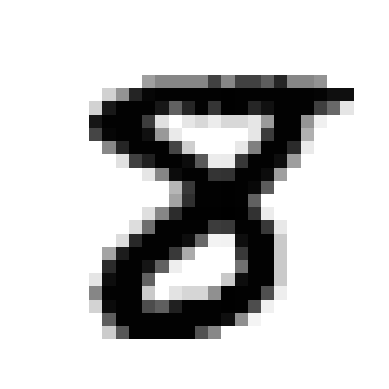

In [21]:
show_image(X_test_copy, 0)

In [ ]:
# modelin doğruluk oranını ölçmek için : 

In [22]:
logReg.score(X_test, y_test)

0.9222